# IRIS 데이터 분류

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/auto.csv

--2021-08-25 10:13:46--  https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/auto.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58697 (57K) [text/plain]
Saving to: ‘auto.csv.2’

auto.csv.2          100%[===================>]  57.32K  --.-KB/s    in 0.008s  

2021-08-25 10:13:46 (7.40 MB/s) - ‘auto.csv.2’ saved [58697/58697]



In [3]:
raw_data = pd.read_csv("auto.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,1:]
y = data[:,:1]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

# Template

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(9,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
3/3 [==============================] - 0s 4ms/step - loss: 0.1008 - mae: 0.2342
loss= 0.10076206177473068
mae= 0.23424090445041656


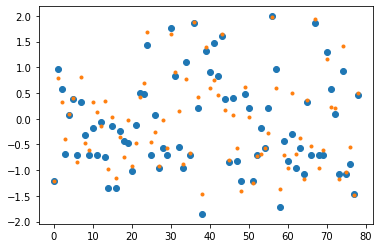

In [5]:
y_ = model.predict(test_x)

plt.plot(test_y, "o")
plt.plot(y_, ".")
plt.show()

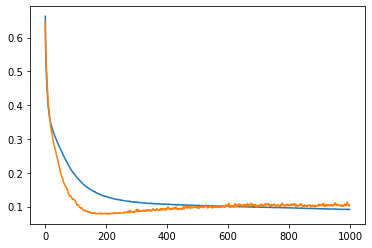

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()